# AutoEncoder_MNIST_HighCompression#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. In this example Max Pool Layers are being used in order to obtain a grater compression.
#### Network ####
Input(28,28,1) - Conv(3,3)  - Maxp (2,2) - Conv(3,3) - Maxp(2,2) - Out (12,12,5) - 2xTransposedConv(2,2) - Output (28,28,1)
#### Note ####
Converges to a nice solution almost always

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [4]:
# dataset properties
print("Values per Image training:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
# dataset properties
print("Values per Image testing:", teX.shape[0])
print("Number of images for testing:", teX.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image training: 784
Number of images for training: 46900
Values per Image testing: 784
Number of images for testing: 23100


In [5]:
#subsample if necessary
trainSampleSize = 46900;
trXSub = trX[:,0:trainSampleSize]

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample6(28,28,1)


Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 28 Out Width: 28
Maxp In Depth: 16 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 14 Out Width: 14
Conv In Depth: 16 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 14 Out Width: 14
Maxp In Depth: 4 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 7 Out Width: 7
Tran In Depth: 4 In Height: 7 In Width: 7 Out Depth: 16 Out Height: 14 Out Width: 14
Tran In Depth: 16 In Height: 14 In Width: 14 Out Depth: 1 Out Height: 28 Out Width: 28


In [8]:
# train and test (prints some result and returns test results)
deepAE.Train(trXSub,trXSub,0.0005,15)

Loss of a given sample at epoch: 0
5.88215
Loss of a given sample at epoch: 1
6.87151
Loss of a given sample at epoch: 2
7.19416
Loss of a given sample at epoch: 3
2.35048
Loss of a given sample at epoch: 4
2.50528
Loss of a given sample at epoch: 5
5.34379
Loss of a given sample at epoch: 6
3.90784
Loss of a given sample at epoch: 7
2.7108
Loss of a given sample at epoch: 8
4.29963
Loss of a given sample at epoch: 9
3.39485
Loss of a given sample at epoch: 10
3.39296
Loss of a given sample at epoch: 11
2.50859
Loss of a given sample at epoch: 12
5.29856
Loss of a given sample at epoch: 13
5.8863
Loss of a given sample at epoch: 14
9.02474


testing:


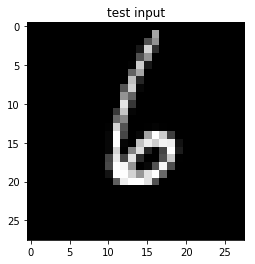

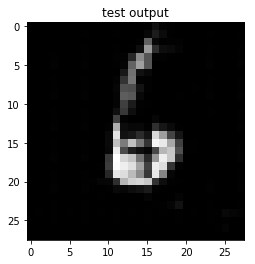

In [13]:
sampleNum = 1
deepAEOut = deepAE.Test(teX[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(teX[:,sampleNum],(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
deepAEOut

array([[2.55155808e-03],
       [3.56297687e-03],
       [5.32095940e-04],
       [1.34447190e-03],
       [1.37036787e-03],
       [1.72992472e-03],
       [2.91920642e-04],
       [1.83137274e-03],
       [1.71787888e-03],
       [1.59950818e-03],
       [1.84429687e-04],
       [6.27869438e-04],
       [1.46734351e-03],
       [6.09630404e-04],
       [3.00304359e-05],
       [7.09987263e-05],
       [1.33417317e-03],
       [1.05704236e-03],
       [8.12790861e-05],
       [2.49030325e-04],
       [1.83988251e-03],
       [2.50629611e-03],
       [3.91204946e-04],
       [1.47928638e-03],
       [1.56646654e-03],
       [2.23442103e-03],
       [3.76273050e-04],
       [1.67127228e-03],
       [2.34137442e-04],
       [1.21699126e-03],
       [1.20158155e-03],
       [3.48304178e-03],
       [1.04813746e-04],
       [6.48848601e-04],
       [1.14363982e-03],
       [7.07051797e-03],
       [2.55027735e-04],
       [1.02188079e-03],
       [1.11291807e-03],
       [3.80501359e-03],
